# Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take a single feature (in Numpy array/Series) and a degree and return a DataFrame where each column is the feature to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the original feature, column 2 is the feature squared and column 3 is the feature cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

## Libraries

In [1]:
import sklearn
import pandas
import numpy as np

Next we're going to write our polynomial function that takes a feature and a maximal degree and returns the DataFrame containing all the powers of the feature up to the maximal degree.

The simplest way to apply a power to a Series is to use the `.apply` and `lambda x:` functions. A Numpy array however can only does it easily with simple arithmetics, otherwise it required a more obscure `np.vectorize`.
For example to take the mock array and compute the third power we can do as follows:

In [2]:
mock = np.array([1., 2., 3.])

mock_series = pandas.Series(mock)

mock_cubed = mock ** 3
mock_cubed_long = np.vectorize(lambda x: x ** 3)(mock)

mock_series_cubed = mock_series.apply(lambda x: x ** 3)

print(mock, mock_cubed, mock_cubed_long)
print(mock_series, "\n", mock_series_cubed)

[1. 2. 3.] [ 1.  8. 27.] [ 1.  8. 27.]
0    1.0
1    2.0
2    3.0
dtype: float64 
 0     1.0
1     8.0
2    27.0
dtype: float64


We can create an empty DataFrame using `pandas.DataFrame()` and then add any columns to it with `dataframe['column_name'] = value`. For example we create an empty DataFrame and make the column 'power_1' to be the first power of our mock value.

In [3]:
data = pandas.DataFrame()
data['power_1'] = mock
print(data)

   power_1
0      1.0
1      2.0
2      3.0


## `polynomial_dataframe` function

Using the hints above complete the following function:

In [6]:
def polynomial_dataframe(feature, degree):
    # assume that degree >= 1
    # initialize the DataFrame:
    poly_data = pandas.DataFrame()
    # and set poly_data['power_1'] equal to the passed feature
    poly_data['power_1'] = feature

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_data[name] = feature ** power

    return poly_data

To test your function consider our **mock** variable and what you would expect the outcome of the following call:

In [7]:
print(polynomial_dataframe(mock, 3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [8]:
full_data = pandas.read_csv(r"/content/drive/MyDrive/FUNIX Progress/MLP302x_1.1-A_EN/data/kc_house_data.csv", index_col=0)

In [9]:
full_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [10]:
full_data = full_data.sort_values(['sqft_living', 'price'])

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [11]:
poly1_data = polynomial_dataframe(full_data['sqft_living'], 1)
poly1_data['price'] = full_data['price'] # add price to the data since it's the target

That is data. Time to make the model and try it on

In [12]:
from sklearn.linear_model import LinearRegression
features_poly1 = np.reshape(poly1_data['power_1'].values, [-1, 1])
labels_poly1 = poly1_data['price'].values
model1 = LinearRegression().fit(features_poly1, labels_poly1)

In [13]:
#let's take a look at the weights before we plot
model1.coef_

array([280.6235679])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

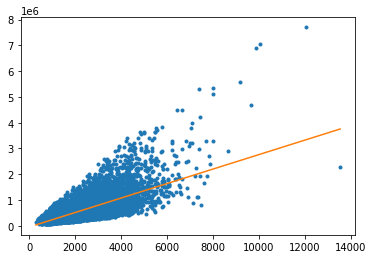

In [15]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(features_poly1),'-')

Let's unpack that plt.plot() command. The first pair is the 1st power of sqft and the actual price, we then ask it to print these as the third values(dots '.'). The next pair is the 1st power of sqft and the predicted values from the linear model, plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [16]:
poly2_data = polynomial_dataframe(full_data['sqft_living'], 2) # create polynomial up to 2 degree
features_poly2 = poly2_data.values # extract the features immediately
poly2_data['price'] = full_data['price']
labels_poly2 = poly2_data['price'].values # receive the labels

model2 = LinearRegression().fit(features_poly2, labels_poly2)

In [17]:
model2.coef_

array([6.79940947e+01, 3.85812609e-02])

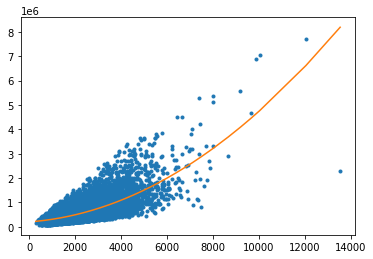

In [18]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(features_poly2),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [19]:
poly3_data = polynomial_dataframe(full_data['sqft_living'], 3) # create polynomial up to 2 degree
features_poly3 = poly3_data.values # extract the features immediately
poly3_data['price'] = full_data['price']
labels_poly3 = poly3_data['price'].values # receive the labels

model3 = LinearRegression().fit(features_poly3, labels_poly3)

In [20]:
model2.coef_

array([6.79940947e+01, 3.85812609e-02])

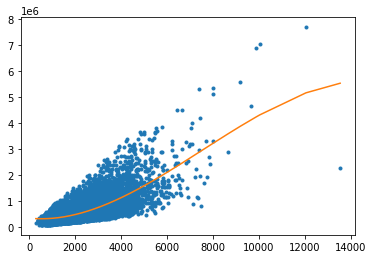

In [23]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(features_poly3),'-')

Now try a 15th degree polynomial:

In [24]:
poly15_data = polynomial_dataframe(full_data['sqft_living'], 15) # create polynomial up to 2 degree
features_poly15 = poly15_data.values # extract the features immediately
poly15_data['price'] = full_data['price']
labels_poly15 = poly15_data['price'].values # receive the labels

model15 = LinearRegression().fit(features_poly15, labels_poly15)

In [25]:
model15.coef_

array([ 1.71165595e-05,  4.21738783e-02,  4.60508013e-06, -4.52740721e-10,
       -2.28220220e-14, -2.18575158e-16, -5.24753851e-16,  3.46077333e-16,
       -2.01227923e-16, -2.72351586e-16,  8.99887803e-17,  7.19476562e-16,
        4.19803081e-16, -4.04190570e-16,  3.81639165e-17])

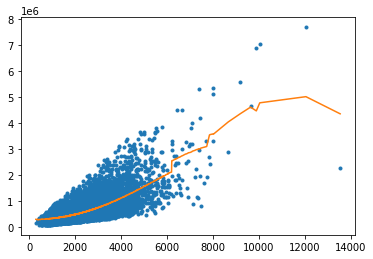

In [26]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(features_poly15),'-')

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

## Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use `.coef_` to access the model's parameters) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split the full_data into 2 subsets with `train_test_split(full_data, train_size=0.5, test_size=0.5 seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `train_test_split(big_set_?, train_size=0.5, test_size=0.5, random_state=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

In [27]:
from sklearn.model_selection import train_test_split
big_set_1, big_set_2 = train_test_split(full_data, train_size=0.5, test_size=0.5, random_state=0)
set_1, set_2 = train_test_split(big_set_1, train_size=0.5, test_size=0.5, random_state=0)
set_3, set_4 = train_test_split(big_set_2, train_size=0.5, test_size=0.5, random_state=0)

**Minor nitpick: Is test_size=0.5 necessary?**
- **Answer:** If None, the value is set to the
    complement of the train size.

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Make a plot of the resulting model (and print the coefficients for 'power_1' if you want to do it now).

In [31]:
poly15_set_1 = polynomial_dataframe(set_1['sqft_living'], 15)
poly15_set_2 = polynomial_dataframe(set_2['sqft_living'], 15)
poly15_set_3 = polynomial_dataframe(set_3['sqft_living'], 15)
poly15_set_4 = polynomial_dataframe(set_4['sqft_living'], 15)

features_poly1 = poly15_set_1.values
features_poly2 = poly15_set_2.values
features_poly3 = poly15_set_3.values
features_poly4 = poly15_set_4.values

poly15_set_1['price'] = set_1['price']
poly15_set_2['price'] = set_2['price']
poly15_set_3['price'] = set_3['price']
poly15_set_4['price'] = set_4['price']

labels_set_1 = poly15_set_1['price'].values
labels_set_2 = poly15_set_2['price'].values
labels_set_3 = poly15_set_3['price'].values
labels_set_4 = poly15_set_4['price'].values

model_set_1 = LinearRegression().fit(features_poly1, labels_set_1)
model_set_2 = LinearRegression().fit(features_poly2, labels_set_2)
model_set_3 = LinearRegression().fit(features_poly3, labels_set_3)
model_set_4 = LinearRegression().fit(features_poly4, labels_set_4)

In [ ]:
print(model_set_1.coef_)
print()
print(model_set_2.coef_)
print()
print(model_set_3.coef_)
print()
print(model_set_4.coef_)
print()

In [46]:
print(model_set_1.coef_[0])
print(model_set_2.coef_[0])
print(model_set_3.coef_[0])
print(model_set_4.coef_[0])

1.5551819076233085e-05
2.6828668234999146e-05
1.6392528059494963e-05
3.4345158019913944e-05


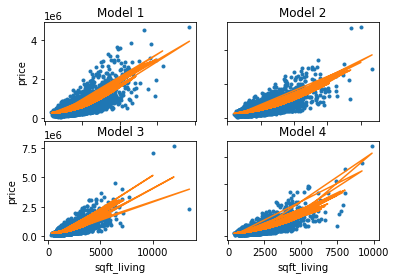

In [42]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(poly15_set_1['power_1'],poly15_set_1['price'],'.',
        poly15_set_1['power_1'], model_set_1.predict(features_poly1),'-')
axs[0, 0].set_title('Model 1')

axs[0, 1].plot(poly15_set_2['power_1'],poly15_set_2['price'],'.',
        poly15_set_2['power_1'], model_set_2.predict(features_poly2),'-')
axs[0, 1].set_title('Model 2')

axs[1, 0].plot(poly15_set_3['power_1'],poly15_set_3['price'],'.',
        poly15_set_3['power_1'], model_set_3.predict(features_poly3),'-')
axs[1, 0].set_title('Model 3')

axs[1, 1].plot(poly15_set_4['power_1'],poly15_set_4['price'],'.',
        poly15_set_4['power_1'], model_set_4.predict(features_poly4),'-')
axs[1, 1].set_title('Model 4')

for ax in axs.flat:
    ax.set(xlabel='sqft_living', ylabel='price')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**
- **Answer:** No

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**
- **Answer:** No

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `train_and_validation` and `test_data`. Use `train_test_split`.
* Further split our training data into two sets: `train_data` and `validation_data`. Use `train_test_split`.

This time, we still set `random_state=1` to obtain consistent results for different users.

In [47]:
# You don't need the import, unless you didn't run the split above
train, test_val = train_test_split(full_data, train_size=0.8, test_size=0.2, random_state=1)
test, validate = train_test_split(big_set_1, train_size=0.5, test_size=0.5, random_state=1)

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python, use inbuilt `range(1, 15+1)`)
    * Build the DataFrame of polynomial data of train_data['sqft_living'] at the current degree <br>
    *Hint:* The DataFrame keep their `.values` consistent to the order of their columns
    * Load the labels of the train_data
    * Learn a polynomial regression model to 'sqft' -> 'price' with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use `.predict()`) for that degree. You will need to apply all the steps above to the validation set.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

In [61]:
# Read the instruction, and proceed. You can leave some values out of the loop
rss = []
for degree in range(1, 15 + 1):
  data = polynomial_dataframe(train['sqft_living'], degree)
  feature = data.values
  data['price'] = train['price']
  label = data['price'].values
  model = LinearRegression().fit(feature, label)

  predict_data = polynomial_dataframe(validate['sqft_living'], degree)
  prediction = model.predict(predict_data.values)
  rss_value = sum((prediction - validate['price']))**2
  print("- Model", degree, ":", rss_value)
  rss.append(rss_value)

print("\n- Min: Model", rss.index(min(rss)) + 1)

- Model 1 : 28207879080104.777
- Model 2 : 38142237402647.96
- Model 3 : 10199499307090.463
- Model 4 : 20026015067311.055
- Model 5 : 18370066658794.793
- Model 6 : 18494747484073.785
- Model 7 : 16985904864512.1
- Model 8 : 15881554209694.904
- Model 9 : 16548200691507.084
- Model 10 : 16543203384202.328
- Model 11 : 15758971323513.906
- Model 12 : 15782486306797.068
- Model 13 : 15981687124882.44
- Model 14 : 15779899928676.97
- Model 15 : 16376907219116.576

- Min: Model 3 10199499307090.463


**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**
- **Answer:** *Model 3*

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data. Report the RSS on your quiz.

In [64]:
# Handholding level: low
data = polynomial_dataframe(train['sqft_living'], 3)
feature = data.values
data['price'] = train['price']
label = data['price'].values
model = LinearRegression().fit(feature, label)

predict_data = polynomial_dataframe(test['sqft_living'], 3)
prediction = model.predict(predict_data.values)
rss_value = sum((prediction - test['price']))**2
print("- Model 3:", rss_value)

- Model 3: 132433892475740.5


**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**